# KAGGLE ASSIGNMENT 1 :  

#### PROBLEM DESCRIPTION :
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### 1. Reading and Understanding the data : 

In [1393]:
# importing the libraries 

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [1394]:
# Reading the data 

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
gender_submission=pd.read_csv("gender_submission.csv")
print(train.head())
print("-------------------------------------------------------------------------------------- ")
print("-------------------------------------------------------------------------------------- ")
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

In [1395]:
print("SHAPE OF TRAIN:",train.shape)
print("SHAPE OF TEST:",test.shape)

SHAPE OF TRAIN: (891, 12)
SHAPE OF TEST: (418, 11)


In [1396]:
print("TRAIN INFO")
print(train.info())
print("------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------")
print("TEST INFO")
print(test.info())

TRAIN INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
------------------------------------------------------------------------------
------------------------------------------------------------------------------
TEST INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-

##### Here it can be seen that there are some missing values in some columns in both train and test data.

In [1397]:
print("TRAIN DESCRIBE:")
print(train.describe())
print("------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------")
print("TEST DESCRIBE")
print(test.describe())

TRAIN DESCRIBE:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
-----------------------------------------------------------------

### 2. Visualizing the Data : 

##### 2.1 Correlation for given dataset : 

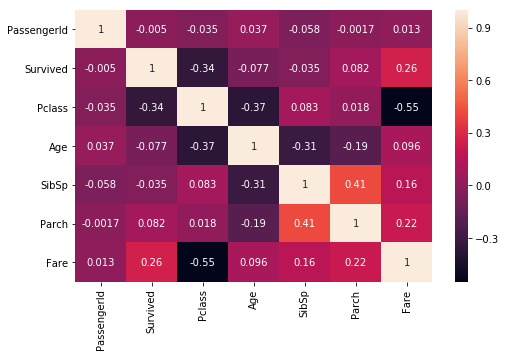

In [1398]:
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

- Here it can be inferred that no features are highly correlated with other features in this dataset.
- Fare and Pclass are negatively coreelated and similarly age and survived are also negatively correlated with Pclass.

##### 2.2 Plots for Numerical variables : 

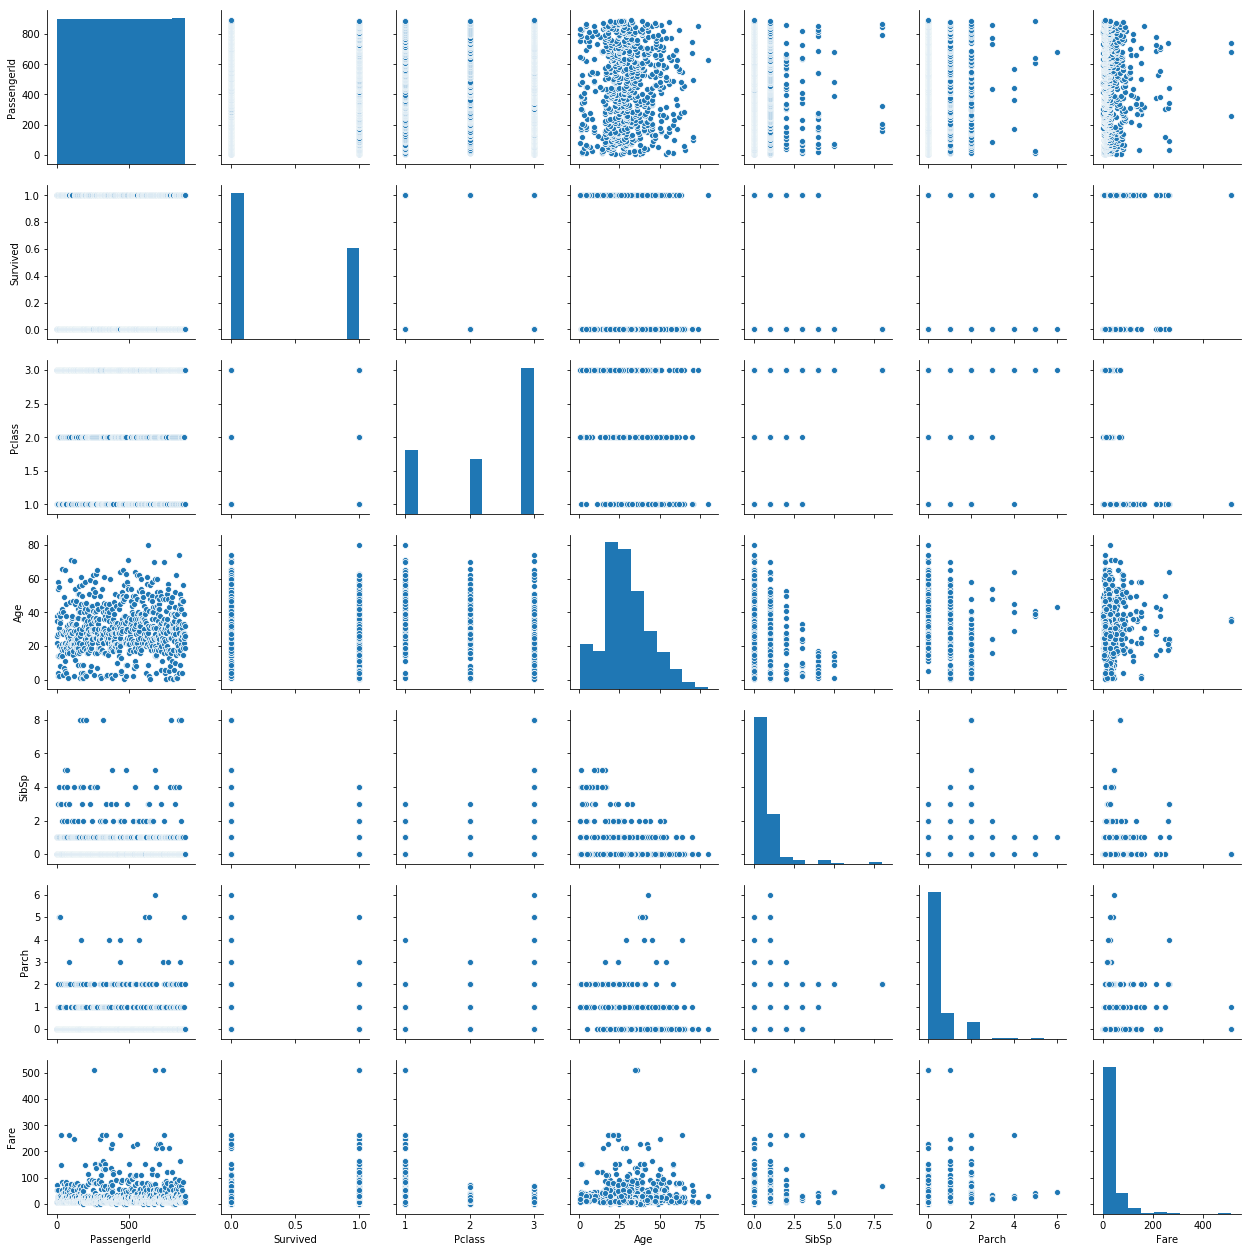

In [1399]:
sns.pairplot(train)

- Here we can visualise that there is no significance in correlation of this dataset.

##### 2.3 Plots of Categorical Variables : 

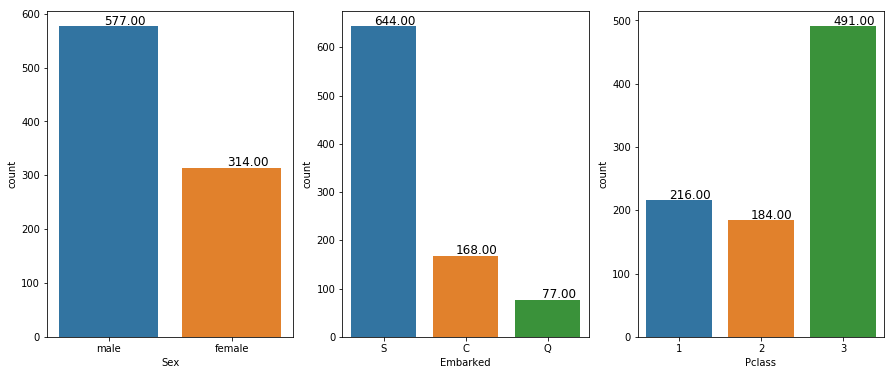

In [1400]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,6))
plt.subplot(1,3,1)
ax=sns.countplot(x='Sex',data=train)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '0.2f'), (p.get_x() + p.get_width()/1.5 , p.get_height()), ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points',fontsize=12)
plt.subplot(1,3,2)
bx=sns.countplot(x='Embarked',data=train)
for p in bx.patches:
    bx.annotate(format(p.get_height(), '0.2f'), (p.get_x() + p.get_width()/1.5 , p.get_height()), ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points',fontsize=12)
plt.subplot(1,3,3)
cx=sns.countplot(x='Pclass',data=train)
for p in cx.patches:
    cx.annotate(format(p.get_height(), '0.2f'), (p.get_x() + p.get_width()/1.5 , p.get_height()), ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points',fontsize=12)
plt.show()

- There were 577 male passengers and 314 female passengers travelling in titanic. 
- More than 80% of people embarks at Southampton.
- More than 50% of the passengers in the ship travelling by pclass 3.

##### 2.4 Histograms : 

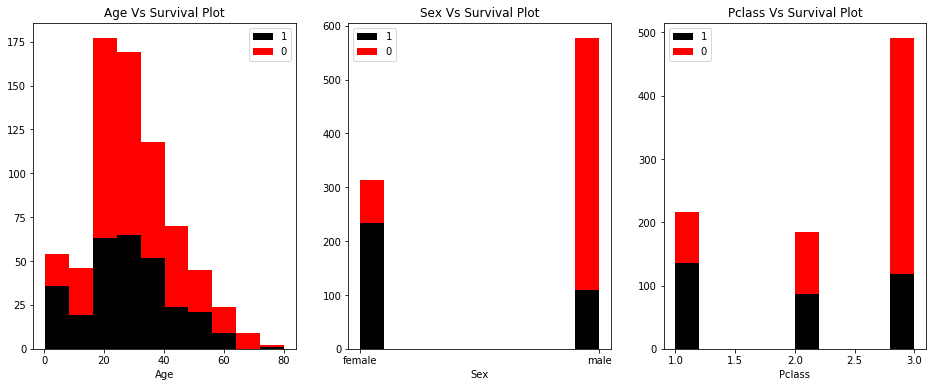

In [1401]:
def create_hist(cols,splotid):
    plt.subplot(splotid)
    plt.hist(x=[train[train['Survived']==1][cols],train[train['Survived']==0][cols]],stacked=True,color=['Black','Red'],label=['1','0'])
    plt.title(cols + ' Vs Survival Plot')
    plt.xlabel(cols)    
    plt.legend()

plt.figure(figsize=[16,6])
create_hist('Age',131)
create_hist('Sex',132)
create_hist('Pclass',133)


- From the above plot it can be seen that though men are in more numbers in the ship the survival rate of female is very high compared to men.
- It is clear than people survived mostly between the age inbetween 20 and 40 in more numbers.
- Though people in large numbers in pclass 3 ticket fare, many people who survived seems to be pclass 1.Nearly 60% people survived in pclass 1 and many people could not survive having taken pclass 3 tickets.

### 3. Data Preparation : 

##### 3.1 Identifying Missing Values and imputation : 

In [1402]:
def MissingData(df):
    t=df.isnull().sum().sort_values(ascending=False)
    p= (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([t, p], axis=1, keys=['Total', 'Percentage'])

In [1403]:
train_miss=MissingData(train)
print(train_miss)
train=train.drop(train_miss[train_miss['Percentage']>40].index,axis=1)
print("TRAIN DATA SHAPE UPDATED:",train.shape)
print("------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------")
test_miss=MissingData(test)
print(test_miss)
test=test.drop(test_miss[test_miss['Percentage']>40].index,axis=1)
print("TEST DATA SHAPE UPDATED:",test.shape)

             Total  Percentage
Cabin          687   77.104377
Age            177   19.865320
Embarked         2    0.224467
Fare             0    0.000000
Ticket           0    0.000000
Parch            0    0.000000
SibSp            0    0.000000
Sex              0    0.000000
Name             0    0.000000
Pclass           0    0.000000
Survived         0    0.000000
PassengerId      0    0.000000
TRAIN DATA SHAPE UPDATED: (891, 11)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
             Total  Percentage
Cabin          327   78.229665
Age             86   20.574163
Fare             1    0.239234
Embarked         0    0.000000
Ticket           0    0.000000
Parch            0    0.000000
SibSp            0    0.000000
Sex              0    0.000000
Name             0    0.000000
Pclass           0    0.000000
PassengerId      0    0.000000
TEST DATA SHAPE UPDATED: (418, 

- Here it is clear that only 3 columns has a missing feature. Since Cabin has nearly 80% of missing values it can be removed as it will be no using in predicting the survival rate. 
- Age has nearly 20% of missing values and it can be imputed with using mean and standard deviation of existing dataset i.e range of random numbers between mean-standard deviation and mean+standard deviation.
- Embarked missing values can be treated with most number of count that the column has( here it is southampton) so we can replace the missing value by southampton(S).

In [1404]:
# Imputing Age: 
def ImputingAge(df):
    m=df['Age'].mean()
    sd=df['Age'].std()
    missing_range=df['Age'].isnull().sum()
    np.random.seed(seed=0)
    age_random=np.random.randint(m-sd,m+sd,size=missing_range)
    age_duplicate=df['Age'].copy()
    age_duplicate[np.isnan(age_duplicate)]=age_random
    df['Age']=age_duplicate
    df['Age']=df['Age'].astype(int)
ImputingAge(train)
ImputingAge(test)

In [1405]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [1406]:
#Since there is no missing value in embarked column in test we impute only for train with most repeated value in that column.
train['Embarked']=train['Embarked'].fillna("S")

#Imputing Fare column in the test dataset 
test['Fare']=test['Fare'].fillna(0)

##### 3.2 Checking DataTypes : 

In [1407]:
print("DATATYPES OF TRAIN:")
print(train.dtypes)
print("---------------------------------------")
print("---------------------------------------")
print("DATATYPES OF TEST:")
print(test.dtypes)

DATATYPES OF TRAIN:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object
---------------------------------------
---------------------------------------
DATATYPES OF TEST:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [1408]:
#Replace male with 1 and female with 0 in Sex column
replace_values={'male':1,'female':0}
train['Sex']=train['Sex'].map(replace_values)
test['Sex']=test['Sex'].map(replace_values)

##### 3.3 Dropping columns : 

In [1409]:
# Here we drop some columns that are not that much useful for our analysis.
drop_list=['Name','Ticket']
train=train.drop(columns=drop_list)
test=test.drop(columns=drop_list)
print("MODIFIED TRAIN SHAPE:",train.shape)
print("MODIFIED TEST SHAPE:",test.shape)

MODIFIED TRAIN SHAPE: (891, 9)
MODIFIED TEST SHAPE: (418, 8)


##### 3.4 Deriving Columns : 

In [1410]:
age_bins=[0,15,40,60,100]
labels=['Children','Adults','MiddleAge','Old']
train['Age_Category']=pd.cut(train['Age'],age_bins,labels=labels)
test['Age_Category']=pd.cut(test['Age'],age_bins,labels=labels)

In [1411]:
train.head(7)

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  \
0            1         0       3    1   22      1      0   7.2500        S   
1            2         1       1    0   38      1      0  71.2833        C   
2            3         1       3    0   26      0      0   7.9250        S   
3            4         1       1    0   35      1      0  53.1000        S   
4            5         0       3    1   35      0      0   8.0500        S   
5            6         0       3    1   27      0      0   8.4583        Q   
6            7         0       1    1   54      0      0  51.8625        S   

  Age_Category  
0       Adults  
1       Adults  
2       Adults  
3       Adults  
4       Adults  
5       Adults  
6    MiddleAge

In [1412]:
test.head(7)

PassengerId  Pclass  Sex  Age  SibSp  Parch     Fare Embarked Age_Category
0          892       3    1   34      0      0   7.8292        Q       Adults
1          893       3    0   47      1      0   7.0000        S    MiddleAge
2          894       2    1   62      0      0   9.6875        Q          Old
3          895       3    1   27      0      0   8.6625        S       Adults
4          896       3    0   22      1      1  12.2875        S       Adults
5          897       3    1   14      0      0   9.2250        S     Children
6          898       3    0   30      0      0   7.6292        Q       Adults

##### 3.5 Creating Dummy Variables: 

In [1413]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(train[['Embarked','Age_Category']], drop_first=True)
dummy2 = pd.get_dummies(test[['Embarked','Age_Category']], drop_first=True)
dummy1.head()

Embarked_Q  Embarked_S  Age_Category_Adults  Age_Category_MiddleAge  \
0           0           1                    1                       0   
1           0           0                    1                       0   
2           0           1                    1                       0   
3           0           1                    1                       0   
4           0           1                    1                       0   

   Age_Category_Old  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [1414]:
dummy2.head()

Embarked_Q  Embarked_S  Age_Category_Adults  Age_Category_MiddleAge  \
0           1           0                    1                       0   
1           0           1                    0                       1   
2           1           0                    0                       0   
3           0           1                    1                       0   
4           0           1                    1                       0   

   Age_Category_Old  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0

In [1415]:
train = pd.concat([train, dummy1], axis=1)
test = pd.concat([test, dummy2], axis=1)
drop_new=['Age_Category','Embarked']
train=train.drop(columns=drop_new)
test=test.drop(columns=drop_new)
train.set_index('PassengerId',inplace=True)
test.set_index('PassengerId',inplace=True)

In [1416]:
#Finalising the dataset before building the model 
train.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked_Q  \
PassengerId                                                                  
1                   0       3    1   22      1      0   7.2500           0   
2                   1       1    0   38      1      0  71.2833           0   
3                   1       3    0   26      0      0   7.9250           0   
4                   1       1    0   35      1      0  53.1000           0   
5                   0       3    1   35      0      0   8.0500           0   

             Embarked_S  Age_Category_Adults  Age_Category_MiddleAge  \
PassengerId                                                            
1                     1                    1                       0   
2                     0                    1                       0   
3                     1                    1                       0   
4                     1                    1                       0   
5                     1                    1                       0   

             Age_Category_Old  
PassengerId                    
1                           0  
2                           0  
3                           0  
4                           0  
5                           0

In [1417]:
test.head()

Pclass  Sex  Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
PassengerId                                                                    
892               3    1   34      0      0   7.8292           1           0   
893               3    0   47      1      0   7.0000           0           1   
894               2    1   62      0      0   9.6875           1           0   
895               3    1   27      0      0   8.6625           0           1   
896               3    0   22      1      1  12.2875           0           1   

             Age_Category_Adults  Age_Category_MiddleAge  Age_Category_Old  
PassengerId                                                                 
892                            1                       0                 0  
893                            0                       1                 0  
894                            0                       0                 1  
895                            1                       0                 0  
896                            1                       0                 0

##### 3.6 Data Imbalance : 

([<matplotlib.patches.Wedge at 0x1f4a2c5f128>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

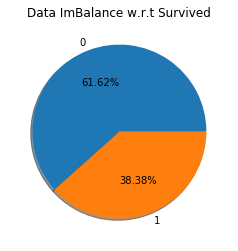

In [1418]:
temp = train['Survived'].value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})
plt.title('Data ImBalance w.r.t Survived')
plt.pie(df['values'], labels=df['labels'].unique(), autopct='%1.2f%%', shadow=True)

### 4. Train-Test Data for Model Selection : 

In [1419]:
#putting feature variable to X 
y_train=train.pop('Survived')
X_train=train

In [1420]:
X_train.head()

Pclass  Sex  Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
PassengerId                                                                    
1                 3    1   22      1      0   7.2500           0           1   
2                 1    0   38      1      0  71.2833           0           0   
3                 3    0   26      0      0   7.9250           0           1   
4                 1    0   35      1      0  53.1000           0           1   
5                 3    1   35      0      0   8.0500           0           1   

             Age_Category_Adults  Age_Category_MiddleAge  Age_Category_Old  
PassengerId                                                                 
1                              1                       0                 0  
2                              1                       0                 0  
3                              1                       0                 0  
4                              1                       0                 0  
5                              1                       0                 0

In [1421]:
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [1422]:
scaler=MinMaxScaler()
X_train[['Fare','Age','Pclass','Parch']] = scaler.fit_transform(X_train[['Fare','Age','Pclass','Parch']])
X_train.head()

Pclass  Sex     Age  SibSp  Parch      Fare  Embarked_Q  \
PassengerId                                                            
1               1.0    1  0.2750      1    0.0  0.014151           0   
2               0.0    0  0.4750      1    0.0  0.139136           0   
3               1.0    0  0.3250      0    0.0  0.015469           0   
4               0.0    0  0.4375      1    0.0  0.103644           0   
5               1.0    1  0.4375      0    0.0  0.015713           0   

             Embarked_S  Age_Category_Adults  Age_Category_MiddleAge  \
PassengerId                                                            
1                     1                    1                       0   
2                     0                    1                       0   
3                     1                    1                       0   
4                     1                    1                       0   
5                     1                    1                       0   

             Age_Category_Old  
PassengerId                    
1                           0  
2                           0  
3                           0  
4                           0  
5                           0

### 5.Model Building : 

##### 5.1 Running the initial Model : 

In [1423]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      879
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.72
Date:                Sat, 31 Aug 2019   Deviance:                       783.44
Time:                        04:33:37   Pearson chi2:                     922.
No. Iterations:                     5   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.3724      0.497      8.792      0.000       3.398       5.347
Pclass                    -2.0326      0.284     -7.146      0.000      -2.590      -1.475
Sex                       -2.7466      0.202    -13.612      0.000      -3.142      -2.351
Age                       -1.4747      1.138     -1.296      0.195      -3.704       0.755
SibSp                     -0.3798      0.116     -3.264      0.001      -0.608      -0.152
Parch                     -0.9471      0.734     -1.291      0.197      -2.386       0.491
Fare                       1.4521      1.262      1.151      0.250      -1.021       3.925
Embarked_Q                -0.0161      0.384     -0.042      0.967      -0.770       0.737
Embarked_S                -0.3405      0.239     -1.428      0.153      -0.808       0.127
Age_Category_Adults       -1.0661      0.428     -2.493      0.013      -1.904      -0.228
Age_Category_MiddleAge    -1.0264      0.686     -1.495      0.135      -2.372       0.319
Age_Category_Old          -1.4573      1.049     -1.389      0.165      -3.514       0.599
==========================================================================================
"""

- Running the model with X_train that we took, features like Embarked_Q has very high p value along with some other features.

##### 5.2 Feature Selection Using RFE : 

In [1424]:
logreg=LogisticRegression()
rfe=RFE(logreg,10)
rfe=rfe.fit(X_train,y_train)

In [1425]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [1426]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', True, 1),
 ('Embarked_Q', False, 2),
 ('Embarked_S', True, 1),
 ('Age_Category_Adults', True, 1),
 ('Age_Category_MiddleAge', True, 1),
 ('Age_Category_Old', True, 1)]

In [1427]:
col=X_train.columns[rfe.support_]
X_train_new=X_train[col]

In [1428]:
X_train.columns[~rfe.support_]

Index(['Embarked_Q'], dtype='object')

In [1429]:
#Assessing the model generated by RFE 
X_train_sm=sm.add_constant(X_train[col])
logmr=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logmr.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.72
Date:                Sat, 31 Aug 2019   Deviance:                       783.44
Time:                        04:33:38   Pearson chi2:                     923.
No. Iterations:                     5   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.3689      0.490      8.911      0.000       3.408       5.330
Pclass                    -2.0351      0.278     -7.313      0.000      -2.581      -1.490
Sex                       -2.7456      0.200    -13.695      0.000      -3.139      -2.353
Age                       -1.4745      1.138     -1.296      0.195      -3.704       0.755
SibSp                     -0.3800      0.116     -3.267      0.001      -0.608      -0.152
Parch                     -0.9447      0.732     -1.291      0.197      -2.378       0.489
Fare                       1.4555      1.259      1.156      0.248      -1.012       3.923
Embarked_S                -0.3353      0.203     -1.648      0.099      -0.734       0.063
Age_Category_Adults       -1.0674      0.427     -2.503      0.012      -1.903      -0.231
Age_Category_MiddleAge    -1.0277      0.686     -1.498      0.134      -2.372       0.317
Age_Category_Old          -1.4592      1.048     -1.392      0.164      -3.514       0.595
==========================================================================================
"""

- Fare has a very high p value which seems to be insignificant and from now on we manually remove some columns and check.

##### MODEL 1:

In [1430]:
X_train_new1=X_train_new.drop(columns='Fare')
X_train_sm1=sm.add_constant(X_train_new1)
logmr1=sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial())
res1=logmr1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.46
Date:                Sat, 31 Aug 2019   Deviance:                       784.91
Time:                        04:33:38   Pearson chi2:                     927.
No. Iterations:                     5   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.5542      0.465      9.785      0.000       3.642       5.466
Pclass                    -2.2103      0.237     -9.341      0.000      -2.674      -1.747
Sex                       -2.7449      0.200    -13.718      0.000      -3.137      -2.353
Age                       -1.4952      1.135     -1.317      0.188      -3.721       0.730
SibSp                     -0.3566      0.114     -3.131      0.002      -0.580      -0.133
Parch                     -0.7376      0.709     -1.041      0.298      -2.127       0.652
Embarked_S                -0.3843      0.199     -1.932      0.053      -0.774       0.006
Age_Category_Adults       -1.0331      0.425     -2.431      0.015      -1.866      -0.200
Age_Category_MiddleAge    -1.0131      0.684     -1.480      0.139      -2.355       0.328
Age_Category_Old          -1.4455      1.046     -1.382      0.167      -3.496       0.605
==========================================================================================
"""

- In this model Parch seems to have high p value which is insignificant and it should be removed.

##### MODEL 2:

In [1431]:
X_train_new2=X_train_new1.drop(columns='Parch')
X_train_sm2=sm.add_constant(X_train_new2)
logmr2=sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial())
res2=logmr2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.01
Date:                Sat, 31 Aug 2019   Deviance:                       786.02
Time:                        04:33:38   Pearson chi2:                     932.
No. Iterations:                     5   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.4446      0.452      9.832      0.000       3.559       5.331
Pclass                    -2.2127      0.237     -9.344      0.000      -2.677      -1.749
Sex                       -2.6992      0.194    -13.889      0.000      -3.080      -2.318
Age                       -1.5291      1.133     -1.350      0.177      -3.749       0.691
SibSp                     -0.3855      0.111     -3.472      0.001      -0.603      -0.168
Embarked_S                -0.3934      0.199     -1.981      0.048      -0.782      -0.004
Age_Category_Adults       -0.9571      0.418     -2.290      0.022      -1.776      -0.138
Age_Category_MiddleAge    -0.9516      0.680     -1.399      0.162      -2.285       0.381
Age_Category_Old          -1.3667      1.039     -1.316      0.188      -3.402       0.669
==========================================================================================
"""

- In this model Age_Category_Old seems to have high p value which is insignificant and it should be removed.

##### MODEL 3:

In [1432]:
X_train_new3=X_train_new2.drop(columns='Age_Category_Old')
X_train_sm3=sm.add_constant(X_train_new3)
logmr3=sm.GLM(y_train,X_train_sm3,family=sm.families.Binomial())
res3=logmr3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.89
Date:                Sat, 31 Aug 2019   Deviance:                       787.78
Time:                        04:33:38   Pearson chi2:                     933.
No. Iterations:                     5   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.4543      0.451      9.866      0.000       3.569       5.339
Pclass                    -2.2157      0.237     -9.348      0.000      -2.680      -1.751
Sex                       -2.7055      0.194    -13.936      0.000      -3.086      -2.325
Age                       -2.7001      0.708     -3.813      0.000      -4.088      -1.312
SibSp                     -0.3737      0.110     -3.402      0.001      -0.589      -0.158
Embarked_S                -0.4121      0.198     -2.080      0.038      -0.800      -0.024
Age_Category_Adults       -0.5541      0.283     -1.961      0.050      -1.108      -0.000
Age_Category_MiddleAge    -0.2384      0.410     -0.581      0.561      -1.042       0.565
==========================================================================================
"""

- Here Age_Category_MiddleAge seems to have crossed the p-value greater than 0.05 and hence it should be removed.

##### MODEL 4:

In [1433]:
X_train_new4=X_train_new3.drop(columns='Age_Category_MiddleAge')
X_train_sm4=sm.add_constant(X_train_new4)
logmr4=sm.GLM(y_train,X_train_sm4,family=sm.families.Binomial())
res4=logmr4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -394.06
Date:                Sat, 31 Aug 2019   Deviance:                       788.11
Time:                        04:33:38   Pearson chi2:                     932.
No. Iterations:                     5   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.4179      0.446      9.907      0.000       3.544       5.292
Pclass                 -2.2132      0.237     -9.345      0.000      -2.677      -1.749
Sex                    -2.7016      0.194    -13.930      0.000      -3.082      -2.321
Age                    -2.9242      0.602     -4.861      0.000      -4.103      -1.745
SibSp                  -0.3693      0.109     -3.381      0.001      -0.583      -0.155
Embarked_S             -0.4161      0.198     -2.101      0.036      -0.804      -0.028
Age_Category_Adults    -0.4444      0.211     -2.110      0.035      -0.857      -0.032
=======================================================================================
"""

In [1434]:
vif=pd.DataFrame()
vif['Features']=X_train_new4.columns
vif['VIF']=[variance_inflation_factor(X_train_new4.values,i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4           Embarked_S  3.42
2                  Age  3.26
0               Pclass  3.25
5  Age_Category_Adults  2.96
1                  Sex  2.94
3                SibSp  1.25

In [1435]:
# Getting the predicted values on the train set
y_train_pred = res4.predict(X_train_sm4).values.reshape(-1)
y_train_pred[:10]

array([0.07372712, 0.90161529, 0.59721858, 0.87089331, 0.06681359,
       0.12694931, 0.33769162, 0.1096858 , 0.58839571, 0.91910776])

##### 5.3 Creating a dataframe with actual survived flag and predicted probabilities

In [1436]:
y_train_pred_final = pd.DataFrame({'PassengerId':y_train.index,'Survived':y_train.values, 'Survived_Prob':y_train_pred})
y_train_pred_final.head()

PassengerId  Survived  Survived_Prob
0            1         0       0.073727
1            2         1       0.901615
2            3         1       0.597219
3            4         1       0.870893
4            5         0       0.066814

### 6. MODEL EVALUATION : 

##### 6.1 Plotting the ROC curve : 

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1437]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1438]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.Survived_Prob, drop_intermediate = False )

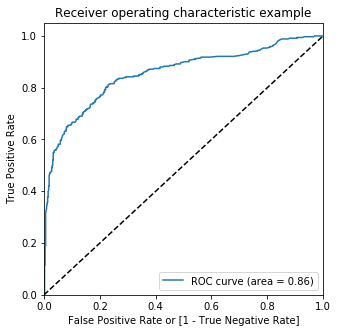

In [1439]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_Prob)

##### 6.2 Optimal Cut-Off Point : 

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1440]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

PassengerId  Survived  Survived_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0            1         0       0.073727    1    0    0    0    0    0    0   
1            2         1       0.901615    1    1    1    1    1    1    1   
2            3         1       0.597219    1    1    1    1    1    1    0   
3            4         1       0.870893    1    1    1    1    1    1    1   
4            5         0       0.066814    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    0    0    0  
3    1    1    0  
4    0    0    0

In [1441]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.561167  0.921053  0.336976
0.2   0.2  0.721661  0.865497  0.632058
0.3   0.3  0.775533  0.827485  0.743169
0.4   0.4  0.785634  0.766082  0.797814
0.5   0.5  0.796857  0.690058  0.863388
0.6   0.6  0.812570  0.631579  0.925319
0.7   0.7  0.801347  0.535088  0.967213
0.8   0.8  0.755331  0.385965  0.985428
0.9   0.9  0.692480  0.207602  0.994536


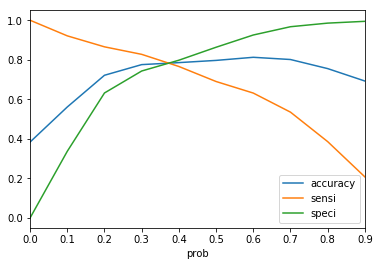

In [1442]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [1443]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

PassengerId  Survived  Survived_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0            1         0       0.073727    1    0    0    0    0    0    0   
1            2         1       0.901615    1    1    1    1    1    1    1   
2            3         1       0.597219    1    1    1    1    1    1    0   
3            4         1       0.870893    1    1    1    1    1    1    1   
4            5         0       0.066814    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    1    1    1                1  
2    0    0    0                1  
3    1    1    0                1  
4    0    0    0                0

In [1444]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.7845117845117845

In [1445]:
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion

array([[428, 121],
       [ 71, 271]], dtype=int64)

In [1446]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1447]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7923976608187134

In [1448]:
# Let us calculate specificity
TN / float(TN+FP)

0.7795992714025501

In [1449]:
# Calculate false postive rate - predicting churn when Passenger does not survived
print(FP/ float(TN+FP))

0.2204007285974499


In [1450]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6913265306122449


In [1451]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8577154308617234


##### 6.3 Precision and Recall : 

##### Precision
TP / TP + FP

In [1452]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6913265306122449

##### Recall
TP / TP + FN

In [1453]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7923976608187134

##### Using sklearn utilities for the same

In [1454]:
precision_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.6913265306122449

In [1455]:
recall_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.7923976608187134

##### 6.4 Precision and Recall Trade-off : 

In [1456]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.Survived_Prob)

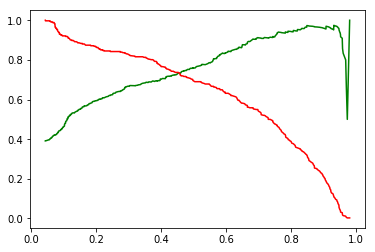

In [1457]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- By precision recall curve it is clear that 0.42 is the optimal cut off point

### 7. TEST PREDICTIONS : 

In [1458]:
#putting feature variable to X 
X_test=test

In [1459]:
X_test[['Fare','Age','Pclass','Parch']] = scaler.transform(X_test[['Fare','Age','Pclass','Parch']])
X_test.head()

Pclass  Sex     Age  SibSp     Parch      Fare  Embarked_Q  \
PassengerId                                                               
892             1.0    1  0.4250      0  0.000000  0.015282           1   
893             1.0    0  0.5875      1  0.000000  0.013663           0   
894             0.5    1  0.7750      0  0.000000  0.018909           1   
895             1.0    1  0.3375      0  0.000000  0.016908           0   
896             1.0    0  0.2750      1  0.166667  0.023984           0   

             Embarked_S  Age_Category_Adults  Age_Category_MiddleAge  \
PassengerId                                                            
892                   0                    1                       0   
893                   1                    0                       1   
894                   0                    0                       0   
895                   1                    1                       0   
896                   1                    1                       0   

             Age_Category_Old  
PassengerId                    
892                         0  
893                         0  
894                         1  
895                         0  
896                         0

In [1460]:
X_test=X_test[X_train_new4.columns]
X_test.head()

Pclass  Sex     Age  SibSp  Embarked_S  Age_Category_Adults
PassengerId                                                             
892             1.0    1  0.4250      0           0                    1
893             1.0    0  0.5875      1           1                    0
894             0.5    1  0.7750      0           0                    0
895             1.0    1  0.3375      0           1                    1
896             1.0    0  0.2750      1           1                    1

In [1461]:
X_test_sm = sm.add_constant(X_test)

In [1462]:
y_test_pred = res4.predict(X_test_sm)

In [1463]:
y_test_pred[:10]

PassengerId
892    0.101190
893    0.425895
894    0.160225
895    0.087521
896    0.542602
897    0.193917
898    0.660104
899    0.172161
900    0.750706
901    0.053987
dtype: float64

In [1464]:
# Converting y_pred to a dataframe which is an array
Final_Submission = pd.DataFrame({'PassengerId':X_test.index,'Survived_Prob':y_test_pred})
Final_Submission.reset_index(inplace = True, drop = True) 
Final_Submission.head()

PassengerId  Survived_Prob
0          892       0.101190
1          893       0.425895
2          894       0.160225
3          895       0.087521
4          896       0.542602

In [1465]:
gender_submission.drop(columns='PassengerId',inplace=True)
gender_submission.head()

Survived
0         0
1         1
2         0
3         0
4         1

In [1387]:
# Appending y_test_df and y_pred_1
Final_Check = pd.concat([Final_Submission, gender_submission],axis=1)
Final_Check.head()

PassengerId  Survived_Prob  Survived
0          892       0.101190         0
1          893       0.425895         1
2          894       0.160225         0
3          895       0.087521         0
4          896       0.542602         1

In [1481]:
Final_Check['Survived_Pred'] = Final_Check.Survived_Prob.map(lambda x: 1 if x > 0.45 else 0)
Final_Check.head()

PassengerId  Survived_Prob  Survived  Survived_Pred
0          892       0.101190         0              0
1          893       0.425895         1              0
2          894       0.160225         0              0
3          895       0.087521         0              0
4          896       0.542602         1              1

In [1482]:
# Let's check the overall accuracy.
metrics.accuracy_score(Final_Check.Survived, Final_Check.Survived_Pred)

0.930622009569378

- The accuracy we calculate with respect to the final output expected by the Kaggle.
- We dont have actual results of the test dataset here.
- Here we have predicted result given by Kaggle and we check the accuracy with respect to the result given by them and so accuracy can be high when we compare with predicted results given by them.
- There are some other methods to predict which may have 100% accuracy with that predicted result given by kaggle.By this approach we get this accuracy with respect to survived column in gender submission dataset.

In [1483]:
confusion = metrics.confusion_matrix(Final_Check.Survived, Final_Check.Survived_Pred)
confusion

array([[243,  23],
       [  6, 146]], dtype=int64)

In [1484]:
# Precision Score
precision_score(Final_Check.Survived, Final_Check.Survived_Pred)

0.863905325443787

In [1485]:
#Recall Score 
recall_score(Final_Check.Survived, Final_Check.Survived_Pred)

0.9605263157894737

In [1490]:
Final_Check=Final_Check[['PassengerId','Survived_Pred']]
Final_Check.set_index('PassengerId',inplace=True)
Final_Check.head()

Survived_Pred
PassengerId               
892                      0
893                      0
894                      0
895                      0
896                      1

In [1491]:
Final_Check.to_csv(r"Final_Submission_Titanic_Survivied_Prediction.csv")